#### dev rerun dataset

In [1]:
import os
import numpy as np
import pandas as pd

In [127]:
from clean_questions import *
from disease_type import extract_disease

In [3]:
qs_path = os.path.join('..', 'funpack_cfg', 'qsidp_subjs_disease_allvisits_extended.tsv')
df_subjects = pd.read_csv(qs_path, sep='\t')

/home/fs0/syzhang/.conda/envs/bbk/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (863,865,867,869) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df_subjects.shape

(23793, 2861)

In [5]:
qs_path = os.path.join('..', 'funpack_cfg', 'qsidp_subjs_control_allvisits_extended.tsv')
df_controls = pd.read_csv(qs_path, sep='\t')

/home/fs0/syzhang/.conda/envs/bbk/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (863,869) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
df_controls.shape

(26490, 2861)

In [112]:
# helpers
def check_field(df, field_code, visit=2):
    """check field in visit x"""
    code = field_code # 6159/2956
    df_copy = df.copy()
    if visit is not None:
        code_root = f'{code}-{visit}'
    else:
        code_root = f'{code}-'
    cols_ls = [col for col in df_copy.columns if col[:len(code_root)]==code_root]
    print(cols_ls)
    return cols_ls

def check_count(df, field_ls, field_status):
    """check status count given field list"""
    df_copy = df.copy()
    rec_ls = []
    for c in field_ls:
        df_tmp = df_copy[df_copy[c]==field_status]
        print(c, df_tmp.shape)
        rec_ls.append(df_tmp)
    # make df from rec list
    df_out = pd.concat(rec_ls)
    return df_out

#### patient
(hand pain not in cwp list, may have hand OA)
just disease category
|
plus pain
| 
pain in sites matching condition

In [72]:
cols_ls = check_field(df_subjects, 6159, visit=2)

['6159-2.0', '6159-2.1', '6159-2.2', '6159-2.3', '6159-2.4', '6159-2.5', '6159-2.6']


In [56]:
cols_ls = check_field(df_subjects, 3799, visit=2)

['3799-2.0']


In [69]:
cols_ls = check_field(df_subjects, 3773, visit=2)

['3773-2.0']


In [70]:
df_cut = check_count(df_subjects, cols_ls, 1)

3773-2.0 (5951, 2861)


In [73]:
df_cut = check_count(df_subjects, cols_ls, -7)

6159-2.0 (6735, 2861)
6159-2.1 (0, 2861)
6159-2.2 (0, 2861)
6159-2.3 (0, 2861)
6159-2.4 (0, 2861)
6159-2.5 (0, 2861)
6159-2.6 (0, 2861)


In [74]:
df_cut.shape

(6735, 2861)

In [24]:
control_disease = disease_label(df_subjects, visits=[2], grouping='simplified')

<AxesSubplot:>

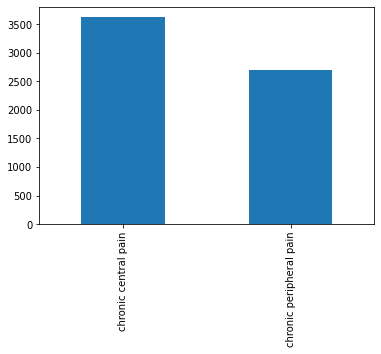

In [25]:
control_disease.sum().plot(kind='bar')

In [26]:
(control_disease.sum(axis=1)>0).sum()

5606

In [27]:
disease_eid = control_disease[control_disease.sum(axis=1)>0].index

In [29]:
df_patients = df_subjects[df_subjects['eid'].isin(disease_eid)]

In [75]:
control_disease = disease_label(df_cut, visits=[2], grouping='detailed')

In [79]:
# control_disease[control_disease.sum(axis=1)>1]

<AxesSubplot:>

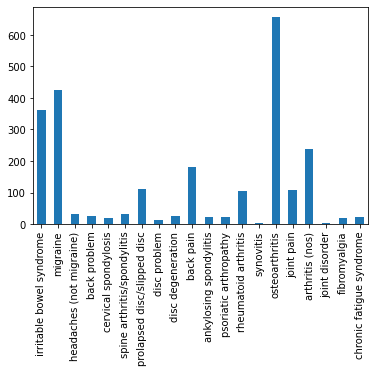

In [77]:
control_disease.sum().plot(kind='bar')

#### patients with pain

In [36]:
dfp = pd.read_csv('./data/qsidp_patients.csv')

/home/fs0/syzhang/.conda/envs/bbk/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (863,867) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [37]:
dfp.shape

(5606, 2861)

In [38]:
dfp.head()

,eid,26414-0.0,26431-0.0,26421-0.0,26412-0.0,26429-0.0,26413-0.0,26430-0.0,26420-0.0,26411-0.0,...,21023-0.0,21027-0.0,21035-0.0,21048-0.0,21052-0.0,21051-0.0,21049-0.0,21057-0.0,21025-0.0,21036-0.0
0,1001416,2.62,NaN,NaN,0.04,NaN,-1.01,NaN,NaN,0.05,...,2017-05-30T14:22:52,1.0,0.0,-601.0,-600.0,-601.0,-600.0,-313.0,3.0,NaN
1,1002910,17.84,NaN,NaN,0.06,NaN,-0.42,NaN,NaN,0.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1003609,7.66,NaN,NaN,0.12,NaN,0.82,NaN,NaN,0.16,...,2017-05-12T20:31:53,1.0,1.0,-601.0,-600.0,-600.0,-602.0,-600.0,5.0,4.0
3,1003611,28.43,NaN,NaN,0.15,NaN,0.69,NaN,NaN,0.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1008668,2.54,NaN,NaN,0.07,NaN,0.05,NaN,NaN,0.11,...,2017-04-28T17:38:23,1.0,1.0,-600.0,-600.0,-601.0,-601.0,-601.0,1.0,8.0


In [39]:
cols_ls = check_field(dfp, 6159, visit=2)

['6159-2.0', '6159-2.1', '6159-2.2', '6159-2.3', '6159-2.4', '6159-2.5', '6159-2.6']


In [41]:
df_np = check_count(dfp, cols_ls, -7)

6159-2.0 (1620, 2861)
6159-2.1 (0, 2861)
6159-2.2 (0, 2861)
6159-2.3 (0, 2861)
6159-2.4 (0, 2861)
6159-2.5 (0, 2861)
6159-2.6 (0, 2861)


In [93]:
df_pp = dfp[~dfp['eid'].isin(df_np['eid'])]

In [94]:
df_pp.shape

(3986, 2861)

In [95]:
fields = pd.read_csv('./bbk_codes/cwp_code.csv')

In [104]:
ff = fields[fields['code']!=6159]['code'].to_list()

In [109]:
cols = []
for f in ff:
    cols += check_field(df_pp, f, visit=2)

['3799-2.0']
['4067-2.0']
['3404-2.0']
['3571-2.0']
['3741-2.0']
['3414-2.0']
['3773-2.0']
['2956-2.0']


In [110]:
cols

['3799-2.0',
 '4067-2.0',
 '3404-2.0',
 '3571-2.0',
 '3741-2.0',
 '3414-2.0',
 '3773-2.0',
 '2956-2.0']

In [113]:
df_ppp = check_count(df_pp, cols, 1)

3799-2.0 (684, 2861)
4067-2.0 (78, 2861)
3404-2.0 (1098, 2861)
3571-2.0 (1364, 2861)
3741-2.0 (342, 2861)
3414-2.0 (837, 2861)
3773-2.0 (1440, 2861)
2956-2.0 (113, 2861)


In [114]:
df_ppp.shape

(5956, 2861)

In [119]:
df_patients_pain  = df_ppp.drop_duplicates('eid')

In [120]:
df_patients_pain.shape

(3363, 2861)

In [121]:
len(np.unique(df_patients_pain['eid']))

3363

In [122]:
ff

[3799, 4067, 3404, 3571, 3741, 3414, 3773, 2956]

#### patients with restricted pain

In [124]:
dfpp = pd.read_csv('./data/qsidp_patients_pain.csv')

/home/fs0/syzhang/.conda/envs/bbk/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (863,867) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [125]:
dfpp.shape

(3363, 2861)

In [150]:
dfd_tmp = extract_disease(dfpp, 1265, visit=[2])
dfd_eid = pd.Series(dfd_tmp[dfd_tmp.values==1].index)

In [147]:
cols = check_field(dfpp, 3799, visit=2)
dfp_tmp = check_count(dfpp, cols, 1)
dfp_eid = dfp_tmp['eid']

['3799-2.0']
3799-2.0 (684, 2861)


In [157]:
eids = dfd_eid[dfd_eid.isin(dfp_eid)]

In [161]:
# dfpp[dfpp['eid'].isin(eids)]

#### pain+ group

In [162]:
cols_ls = check_field(df_subjects, 6159, visit=2)

['6159-2.0', '6159-2.1', '6159-2.2', '6159-2.3', '6159-2.4', '6159-2.5', '6159-2.6']


In [163]:
df_np = check_count(df_subjects, cols_ls, -7)

6159-2.0 (6735, 2861)
6159-2.1 (0, 2861)
6159-2.2 (0, 2861)
6159-2.3 (0, 2861)
6159-2.4 (0, 2861)
6159-2.5 (0, 2861)
6159-2.6 (0, 2861)


In [164]:
df_pp = df_subjects[~df_subjects['eid'].isin(df_np['eid'])]

In [165]:
df_pp.shape

(17058, 2861)

In [166]:
fields = pd.read_csv('./bbk_codes/cwp_code.csv')

In [167]:
ff = fields[fields['code']!=6159]['code'].to_list()

In [168]:
cols = []
for f in ff:
    cols += check_field(df_pp, f, visit=2)

['3799-2.0']
['4067-2.0']
['3404-2.0']
['3571-2.0']
['3741-2.0']
['3414-2.0']
['3773-2.0']
['2956-2.0']


In [169]:
df_ppp = check_count(df_pp, cols, 1)

3799-2.0 (2152, 2861)
4067-2.0 (222, 2861)
3404-2.0 (4572, 2861)
3571-2.0 (5113, 2861)
3741-2.0 (1103, 2861)
3414-2.0 (3232, 2861)
3773-2.0 (5951, 2861)
2956-2.0 (302, 2861)


In [171]:
df_ppain  = df_ppp.drop_duplicates('eid')

In [172]:
df_ppain.shape

(14412, 2861)

#### control pain- group

In [183]:
def cwp_positive(df, positive=True):
    """return subset of subjects with pain"""
    # restrict to those with Pain type(s) experienced in last month
    cols_ls = check_field(df, 6159, visit=2)
    df_np = check_count(df, cols_ls, -7)
    if positive:
        df_plm = df[~df['eid'].isin(df_np['eid'])]
    else:
        df_plm = df_np
    # restrict to those with one of the 3+ month cwp
    fields = pd.read_csv('./bbk_codes/cwp_code.csv')
    ff = fields[fields['code']!=6159]['code'].to_list()
    cols = []
    for f in ff:
        cols += check_field(df_plm, f, visit=2)
    if positive:
        df_ppp = check_count(df_plm, cols, 1)
    else:
        df_ppp = df_plm
    df_out = df_ppp.drop_duplicates('eid')
#     return df_out
    return df_np

In [174]:
df_controls.shape

(26490, 2861)

In [181]:
tmp = cwp_positive(df_subjects, positive=False) #4285 positive

['6159-2.0', '6159-2.1', '6159-2.2', '6159-2.3', '6159-2.4', '6159-2.5', '6159-2.6']
6159-2.0 (6735, 2861)
6159-2.1 (0, 2861)
6159-2.2 (0, 2861)
6159-2.3 (0, 2861)
6159-2.4 (0, 2861)
6159-2.5 (0, 2861)
6159-2.6 (0, 2861)
['3799-2.0']
['4067-2.0']
['3404-2.0']
['3571-2.0']
['3741-2.0']
['3414-2.0']
['3773-2.0']
['2956-2.0']
3799-2.0 (0, 2861)
4067-2.0 (0, 2861)
3404-2.0 (0, 2861)
3571-2.0 (0, 2861)
3741-2.0 (0, 2861)
3414-2.0 (0, 2861)
3773-2.0 (0, 2861)
2956-2.0 (0, 2861)


In [182]:
tmp.shape

(6735, 2861)

In [188]:
cols_ls = check_field(df_subjects, 3799, visit=2)

['3799-2.0']


In [84]:
df_cut = check_count(df_controls, cols_ls, -7)

6159-2.0 (19593, 2861)
6159-2.1 (0, 2861)
6159-2.2 (0, 2861)
6159-2.3 (0, 2861)
6159-2.4 (0, 2861)
6159-2.5 (0, 2861)
6159-2.6 (0, 2861)


In [90]:
df_cut.shape

(19593, 2861)

In [85]:
control_disease = disease_label(df_cut, visits=[2], grouping='detailed')

In [88]:
control_disease.sum().sum()

2996

In [184]:
test = pd.read_csv('./data/qsidp_controls.csv')

/home/fs0/syzhang/.conda/envs/bbk/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (863) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [185]:
test.shape

(17718, 2861)

In [189]:
df_cut = check_count(test, cols_ls, 1)

3799-2.0 (0, 2861)


In [190]:
testd = disease_label(test, visits=[2], grouping='detailed')

In [191]:
testd.sum()

irritable bowel syndrome         0
migraine                         0
headaches (not migraine)        21
back problem                     0
cervical spondylosis             0
spine arthritis/spondylitis      0
prolapsed disc/slipped disc      0
disc problem                     0
disc degeneration                0
back pain                        0
ankylosing spondylitis          18
psoriatic arthropathy            0
rheumatoid arthritis             0
synovitis                        2
osteoarthritis                   0
joint pain                      69
arthritis (nos)                398
joint disorder                   2
fibromyalgia                    15
chronic fatigue syndrome        28
dtype: int64

In [192]:
testt = pd.read_csv('./data/qsidp_pain_plus.csv')

/home/fs0/syzhang/.conda/envs/bbk/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (863,865,867,869) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [193]:
testt.shape

(18697, 2861)

In [194]:
testt = pd.read_csv('./data/qsidp_pain_minus.csv')

/home/fs0/syzhang/.conda/envs/bbk/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (863) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [195]:
testt.shape

(26328, 2861)

#### digestive
no condition and no pain (visit 0 and 2 too?) and imaging before digestive

In [196]:
df_controls = pd.read_csv('./data/qsidp_controls.csv')

/home/fs0/syzhang/.conda/envs/bbk/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (863) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [197]:
qs = load_qscode(questionnaire=['digestive', 'demographic'], idp=None)
df_qs = extract_qs(df_controls, df_questionnaire=qs, visits=[2])

In [198]:
df_qs.rename(columns={'53-2.0':'imaging_date', '21023-0.0':'digest_date'}, inplace=True)

In [199]:
# to dt
df_dt = pd.to_datetime(df_qs['digest_date'])
df_it = pd.to_datetime(df_qs['imaging_date'])
# calcualte diff
diff = (df_dt-df_it).values
dff = diff.astype('int64')

In [201]:
# those finished digestive after imaging
sum(dff>0)/len(dff)

0.27252081756245267

In [202]:
# those finished digestive after imaging
df_dig = df_qs[dff>0]

In [203]:
df_dig.shape

(4680, 36)

In [204]:
df_digdiff = pd.to_datetime(df_dig['digest_date']) - pd.to_datetime(df_dig['imaging_date'])

In [205]:
df_digdiff.mean()

Timedelta('496 days 03:26:14.097008544')

In [206]:
df_digdiff.std()

Timedelta('305 days 20:49:21.630547256')

In [207]:
df_dig['eid']

5        1001143
10       1002039
11       1002393
12       1003045
13       1003203
          ...   
17158    6020209
17163    6022107
17165    6022279
17168    6023724
17169    6023887
Name: eid, Length: 4680, dtype: int64

In [208]:
df_painfree = df_controls[df_controls['eid'].isin(df_dig['eid'])]

In [209]:
cols_ls = check_field(df_painfree, 6159, visit=2)

['6159-2.0', '6159-2.1', '6159-2.2', '6159-2.3', '6159-2.4', '6159-2.5', '6159-2.6']


In [210]:
df_cut = check_count(df_painfree, cols_ls, -7)

6159-2.0 (4680, 2861)
6159-2.1 (0, 2861)
6159-2.2 (0, 2861)
6159-2.3 (0, 2861)
6159-2.4 (0, 2861)
6159-2.5 (0, 2861)
6159-2.6 (0, 2861)


In [211]:
control_disease = disease_label(df_cut, visits=[2], grouping='detailed')

In [212]:
control_disease.sum()

irritable bowel syndrome       0
migraine                       0
headaches (not migraine)       0
back problem                   0
cervical spondylosis           0
spine arthritis/spondylitis    0
prolapsed disc/slipped disc    0
disc problem                   0
disc degeneration              0
back pain                      0
ankylosing spondylitis         0
psoriatic arthropathy          0
rheumatoid arthritis           0
synovitis                      0
osteoarthritis                 0
joint pain                     0
arthritis (nos)                0
joint disorder                 0
fibromyalgia                   0
chronic fatigue syndrome       0
dtype: int64

In [213]:
df_nodisease = control_disease.sum(axis=1)==False

In [214]:
df_nodisease.sum()

4680

In [215]:
df_paindiseasefree = df_cut[df_nodisease.values]

In [216]:
df_paindiseasefree.shape

(4680, 2861)

In [217]:
cols_ls = check_field(df_paindiseasefree, 21027, visit=0)

['21027-0.0']


In [218]:
cols_ls = check_field(df_paindiseasefree, 21048, visit=0)

['21048-0.0']


In [219]:
cols_ls = check_field(df_paindiseasefree, 21048, visit=0)

['21048-0.0']


In [220]:
df_cut = check_count(df_paindiseasefree, cols_ls, -602)

21048-0.0 (219, 2861)


In [221]:
df_cut = check_count(df_paindiseasefree, cols_ls, -602)

21048-0.0 (219, 2861)


In [222]:
df_cut = check_count(df_paindiseasefree, cols_ls, -601)

21048-0.0 (1998, 2861)


In [223]:
df_cut = check_count(df_paindiseasefree, cols_ls, 1)

21048-0.0 (0, 2861)
